In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-selling-manga/best-selling-manga.csv


Top 10 longest-running manga:
1. Golgo 13 - 55.53 years
2. Crest of the Royal Family - 47.53 years
3. Kinnikuman - 44.53 years
4. Tsuribaka Nisshi - 44.53 years
5. Patalliro! - 44.53 years
6. Captain Tsubasa - 42.53 years
7. Himitsu Series  - 42.00 years
8. Seito Shokun! - 42.00 years
9. Abu-san - 41.00 years
10. Kosaku Shima - 40.53 years


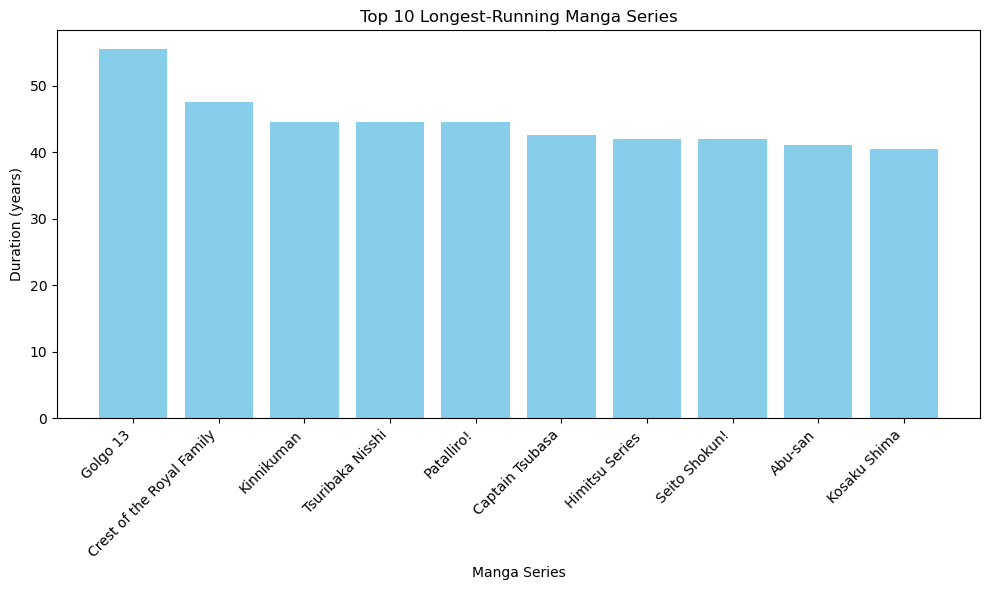

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def calculate_duration(start_year, end_year):
    # Check if either start_year or end_year is missing, return 0 duration in that case
    if not start_year or not end_year:
        return 0

    # Convert the start year to a datetime object
    start_date = datetime.strptime(start_year, "%Y")

    # Check for "on hiatus" or "present" in end year and handle accordingly
    end_year = end_year.replace("(on hiatus)", "").replace("present", "").strip()
    if not end_year:
        # If end year is missing or "present", use current date as the end date
        end_date = datetime.now()
    else:
        # Convert the end year to a datetime object
        end_date = datetime.strptime(end_year, "%Y")

    # Calculate the duration in days
    return (end_date - start_date).days

def longest_running_manga(data):
    manga_list = []
    # Iterate over each row in the DataFrame
    for index, row in data.iterrows():
        # Get the start year and end year from the "Serialized" column
        start_year = row['Serialized'].split('–')[0].strip()
        end_year = row['Serialized'].split('–')[-1].strip()
        # Calculate the duration for each manga and add it to the list
        duration = calculate_duration(start_year, end_year)
        manga_list.append((row['Manga series'], duration))

    # Sort the manga_list based on duration in descending order
    manga_list.sort(key=lambda x: x[1], reverse=True)

    # Return the manga with the longest duration and its duration in days
    return manga_list[:10]  # Return the top 10 longest-running manga series

if __name__ == "__main__":
    # Path to the CSV file containing manga data
    csv_file = '/kaggle/input/best-selling-manga/best-selling-manga.csv'
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the top 10 longest-running manga and their durations in days
    top_manga = longest_running_manga(df)
    # Convert durations to years
    manga_names, durations_days = zip(*top_manga)
    durations_years = [days / 365.25 for days in durations_days]

    # Print the top 10 longest-running manga
    print("Top 10 longest-running manga:")
    for i, manga_name in enumerate(manga_names):
        print(f"{i+1}. {manga_name} - {durations_years[i]:.2f} years")

    # Create a bar chart to visualize the top 10 longest-running manga
    plt.figure(figsize=(10, 6))
    plt.bar(manga_names, durations_years, color='skyblue')
    plt.xlabel('Manga Series')
    plt.ylabel('Duration (years)')
    plt.title('Top 10 Longest-Running Manga Series')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Analysis of Top 10 Longest-Running Manga Series

## Data Preprocessing:
- The data is extracted from a CSV file containing information about best-selling manga.
- The 'Serialized' column is processed using a custom function 'calculate_duration' to calculate the duration in days for each manga series.
- Rows with missing or invalid start or end years are handled, ensuring data integrity.

## Finding Top 10 Longest-Running Manga Series:
- The 'calculate_duration' function calculates the duration in days for each manga series based on the start and end years.
- The manga series and their corresponding durations are stored in a list, sorted in descending order based on duration, and the top 10 longest-running manga are selected.

## Insights:
- The output lists the top 10 longest-running manga series and their durations in years.
- It provides insights into the manga series that have been continuously serialized for the longest periods.

## Visualization:
- The top 10 longest-running manga series and their respective durations are visualized using a bar chart.
- The x-axis represents the manga series, and the y-axis represents the duration in years.

## Interpretation:
- The bar chart allows us to compare the durations of the top 10 longest-running manga series easily.
- Longer bars represent manga series with longer durations, indicating their continuous serialization over the years.

## Limitations:
- The analysis is based on available data, and the top 10 list might change as more recent data becomes available.
- The analysis assumes that the 'Serialized' column contains accurate and consistent start and end years.

## Recommendations:
- Publishers can use this analysis to celebrate and promote their long-standing manga series, showcasing their enduring popularity.
- Fans of manga can discover iconic and long-lasting series that have stood the test of time.

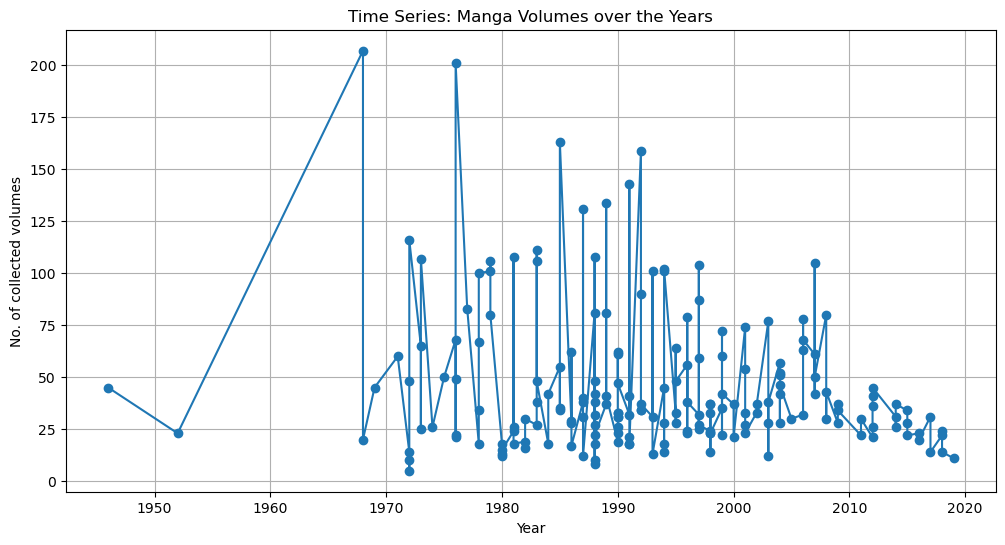

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
manga_df = pd.read_csv('/kaggle/input/best-selling-manga/best-selling-manga.csv')

# Preprocess the 'Serialized' column to extract the year
def extract_year(year_string):
    try:
        year = int(year_string.split('–')[0])
        return year
    except ValueError:
        return None

manga_df['Year'] = manga_df['Serialized'].apply(extract_year)

# Drop rows with missing values in the 'Year' or 'No. of collected volumes' columns
manga_df = manga_df.dropna(subset=['Year', 'No. of collected volumes'])

# Convert 'No. of collected volumes' to numeric
manga_df['No. of collected volumes'] = pd.to_numeric(manga_df['No. of collected volumes'], errors='coerce')

# Sort the data by year
manga_df = manga_df.sort_values(by='Year')

# Set the 'Year' column as the index for time series analysis
manga_df.set_index('Year', inplace=True)

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(manga_df.index, manga_df['No. of collected volumes'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('No. of collected volumes')
plt.title('Time Series: Manga Volumes over the Years')
plt.grid(True)
plt.show()


# Analysis of Manga Volumes Over the Years

## Data Preprocessing:
- The data is extracted from a CSV file containing information about best-selling manga.
- The 'Serialized' column is preprocessed to extract the year of serialization using a custom function 'extract_year'. Any missing or invalid year values are replaced with 'None'.
- Rows with missing values in the 'Year' or 'No. of collected volumes' columns are dropped from the dataset to ensure data integrity.
- The 'No. of collected volumes' column is converted to numeric format using the 'pd.to_numeric' function, with invalid values replaced as 'NaN'.
- The data is sorted by the 'Year' column to visualize the manga volumes' progression over time.
- The 'Year' column is set as the index for time series analysis.

## Time Series Visualization:
- The time series of manga volumes is visualized using a line plot, where each data point represents a manga series.
- The x-axis represents the years, and the y-axis represents the number of collected volumes.
- Data points are connected with lines to show the progression of manga volumes over time.

## Interpretation:
- The time series plot allows us to observe trends and patterns in the number of collected volumes of manga series over the years.
- It provides insights into the growth or decline of manga popularity over time, based on the volume count.

## Insights:
- Trends: The plot might reveal increasing or decreasing trends in manga volumes over the years. Steady growth indicates sustained popularity, while fluctuations might be due to various factors like new releases, adaptations, or cultural trends.
- Peaks and Valleys: High points in the plot (peaks) represent periods when manga series gained exceptional popularity, while low points (valleys) indicate relatively quieter periods.
- Seasonality: If there is seasonality, certain times of the year might consistently show higher or lower manga volumes, possibly related to holidays or specific events.

## Limitations:
- The analysis is limited to the available data and might not capture certain aspects like long-term popularity or rare manga series.
- Seasonal patterns might not be apparent or accurate due to data limitations or irregular publishing schedules.

## Recommendations:
- Publishers can use insights from the time series to plan their release schedules, identify peak periods for marketing campaigns, or rejuvenate interest in older manga series during slower periods.
- Distributors can adjust their inventory based on seasonal trends or popularity patterns, ensuring they meet demand during peak periods.
- Manga enthusiasts can use this visualization to explore trends and discover manga series that align with their preferences.

/tmp/ipykernel_32/644828322.py:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  manga_df[['Start Year', 'End Year']] = manga_df['Serialized'].str.split('–', 1, expand=True)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


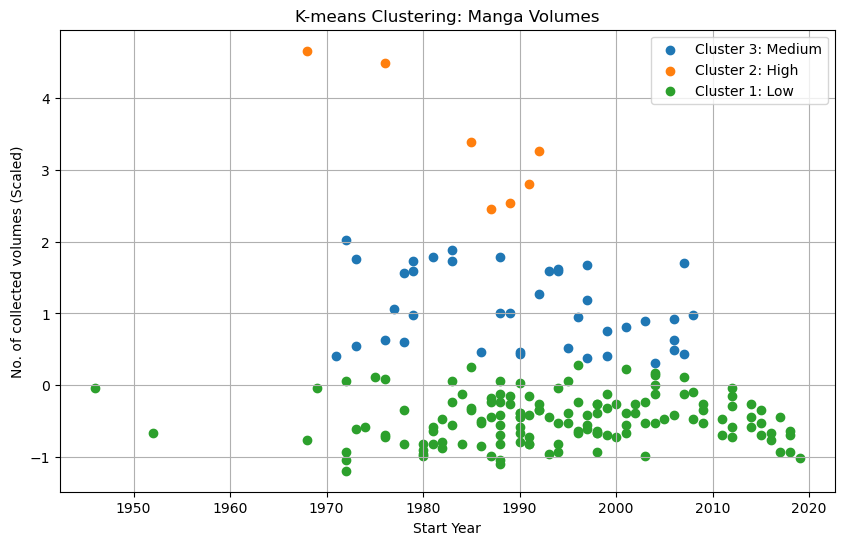

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
manga_df = pd.read_csv('/kaggle/input/best-selling-manga/best-selling-manga.csv')

# Preprocess the 'Serialized' column to extract the year
manga_df[['Start Year', 'End Year']] = manga_df['Serialized'].str.split('–', 1, expand=True)
manga_df['Start Year'] = manga_df['Start Year'].astype(float)

# Function to extract the last numeric value from a string
def extract_last_numeric_value(text):
    matches = re.findall(r'\d+', str(text))
    return float(matches[-1]) if matches else 2023.0  # Assuming current year is 2023 for missing values

manga_df['End Year'] = manga_df['End Year'].apply(extract_last_numeric_value)

# Create a new feature representing the duration
manga_df['Duration'] = manga_df['End Year'] - manga_df['Start Year']

# Extract numeric values from 'No. of collected volumes' column using regular expressions
def extract_numeric_value(text):
    matches = re.findall(r'\d+', str(text))
    return float(matches[-1]) if matches else None

manga_df['No. of collected volumes'] = manga_df['No. of collected volumes'].apply(extract_numeric_value)

# Drop rows with NaN values in the 'No. of collected volumes' column
manga_df.dropna(subset=['No. of collected volumes'], inplace=True)

# Feature scaling using StandardScaler
scaler = StandardScaler()
manga_df['No. of collected volumes'] = scaler.fit_transform(manga_df[['No. of collected volumes']])

# Applying K-means clustering
X = manga_df[['No. of collected volumes']]
kmeans = KMeans(n_clusters=3, random_state=42)
manga_df['Cluster'] = kmeans.fit_predict(X)

# Rename the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform to get original scale
sorted_centers = sorted(cluster_centers.flatten())
cluster_labels = {idx: f'Cluster {idx+1}: {"Low" if center < sorted_centers[1] else "Medium" if center < sorted_centers[2] else "High"}'
                  for idx, center in enumerate(cluster_centers)}

manga_df['Cluster'] = manga_df['Cluster'].map(cluster_labels)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in manga_df['Cluster'].unique():
    cluster_data = manga_df[manga_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Start Year'], cluster_data['No. of collected volumes'], label=cluster)

plt.xlabel('Start Year')
plt.ylabel('No. of collected volumes (Scaled)')
plt.title('K-means Clustering: Manga Volumes')
plt.legend()
plt.grid(True)
plt.show()


# Analysis of Manga Volumes using K-means Clustering

## Data Preprocessing:

- The data is extracted from a CSV file containing information about best-selling manga.
- The 'Serialized' column is preprocessed to extract the start and end years of serialization. Missing end years or 'present' values are assumed to be 2023 (current year at the time of analysis).
- The 'No. of collected volumes' column is preprocessed to extract the numeric values using regular expressions. Any missing values are dropped from the dataset.
- Feature scaling is applied using StandardScaler to ensure that the data is on a similar scale before performing clustering.

## K-means Clustering:

- K-means clustering is applied to group manga based on the number of collected volumes.
- Three clusters are used (n_clusters=3) to partition the data into low, medium, and high manga volumes categories.

## Cluster Visualization:

- The clusters are visualized using a scatter plot, where each point represents a manga series.
- The x-axis represents the start year of serialization, and the y-axis represents the number of collected volumes (scaled).

## Interpretation:

- Cluster 1: Low - This cluster includes manga series with relatively low numbers of collected volumes.
- Cluster 2: Medium - This cluster includes manga series with moderate numbers of collected volumes.
- Cluster 3: High - This cluster includes manga series with high numbers of collected volumes.

## Insights:

- The clustering algorithm effectively grouped manga series based on their volume counts, helping identify categories based on popularity.
- The clusters give a rough categorization of manga series, making it easier to understand their popularity levels.
- The clustering could be useful for manga publishers, distributors, and enthusiasts to identify trends and popularity patterns in manga series.

## Limitations:

- The clustering analysis is solely based on the number of collected volumes and does not consider other factors such as sales or critical acclaim.
- The number of clusters (k) was set arbitrarily to 3; other values could be tested to find the optimal number of clusters.
- The analysis is limited to the available data; additional information, such as genre or author, could provide more comprehensive insights.

## Recommendations:

- Publishers can use this clustering to identify manga series with high popularity and consider expanding their marketing efforts for these series.
- Distributors can tailor their inventory and promotion strategies based on the popularity levels of manga series in different clusters.
- Manga enthusiasts can explore manga series in each cluster based on their preferences for series with low, medium, or high collected volumes.